In [4]:
import pandas as pd
from nltk.corpus import stopwords
import tensorflow as tf
import numpy as np


from tensorflow import keras
from keras import models, layers



from sklearn.preprocessing import LabelEncoder

np.random.seed(1234)

In [12]:

df = pd.read_csv('dataset.csv', encoding='latin1')
df.pop('Language')



print(df.head())
df = df.truncate(before=0, after=20000)
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]

print("train data size: ", train.shape)
print("test data size: ", test.shape)

                                                Text      Label
0  @Charlie_Corley @Kristine1G @amyklobuchar @Sty...  litigious
1  #BadBunny: Como dos gotas de agua: Joven se di...   negative
2  https://t.co/YJNiO0p1JV Flagstar Bank disclose...  litigious
3  Rwanda is set to host the headquarters of Unit...   positive
4  OOPS. I typed her name incorrectly (todayâs ...  litigious
train data size:  (16016, 2)
test data size:  (3985, 2)


<AxesSubplot:>

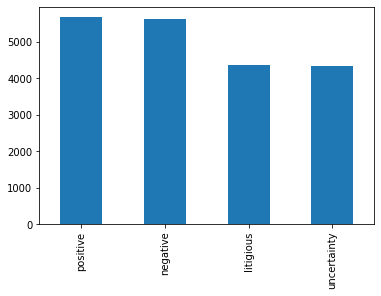

In [13]:
import matplotlib.pyplot as plt
df['Label'].value_counts().plot(kind='bar')

In [14]:
num_labels = 2
vocab_size = 10000
batch_size = 100

tokenizer = keras.preprocessing.text.Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(train.Text)

x_train = tokenizer.texts_to_matrix(train.Text, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.Text, mode='tfidf')

encoder = LabelEncoder()
encoder.fit(train.Label)
y_train = encoder.transform(train.Label)
y_test = encoder.transform(test.Label)

# check shape
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)

train shapes: (16016, 10000) (16016,)
test shapes: (3985, 10000) (3985,)


In [15]:

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))



In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'],
              run_eagerly=True)


In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
12/12 [==============================] - 1s 88ms/step - loss: -0.1674 - accuracy: 0.2902 - val_loss: -1.0230 - val_accuracy: 0.2790
Epoch 2/20
12/12 [==============================] - 1s 60ms/step - loss: -1.7497 - accuracy: 0.2970 - val_loss: -2.4392 - val_accuracy: 0.2829
Epoch 3/20
12/12 [==============================] - 1s 60ms/step - loss: -3.4697 - accuracy: 0.3072 - val_loss: -4.1710 - val_accuracy: 0.2879
Epoch 4/20
12/12 [==============================] - 1s 54ms/step - loss: -5.6989 - accuracy: 0.3150 - val_loss: -6.3949 - val_accuracy: 0.2952
Epoch 5/20
12/12 [==============================] - 1s 54ms/step - loss: -8.5119 - accuracy: 0.3216 - val_loss: -9.0999 - val_accuracy: 0.3018
Epoch 6/20
12/12 [==============================] - 1s 55ms/step - loss: -11.8949 - accuracy: 0.3276 - val_loss: -12.2233 - val_accuracy: 0.3056
Epoch 7/20
12/12 [==============================] - 1s 57ms/step - loss: -15.7667 - accuracy: 0.3311 - val_loss: -15.7360 - val_accuracy: 0.

In [19]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

125/125 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.15      0.27       833
           1       0.29      1.00      0.45      1123
           2       0.00      0.00      0.00      1108
           3       0.00      0.00      0.00       921

    accuracy                           0.31      3985
   macro avg       0.32      0.29      0.18      3985
weighted avg       0.28      0.31      0.18      3985



C:\Users\BillP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BillP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BillP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: Unde

In [20]:
max_features = 10000
maxlen = 10000
batch_size = 32

model = models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=maxlen)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.MaxPooling1D(5)) 
model.add(layers.Conv1D(32, 7, activation='relu')) 
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10000, 128)        1280000   
                                                                 
 conv1d (Conv1D)             (None, 9994, 32)          28704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1998, 32)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 1992, 32)          7200      
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_6 (Dense)             (None, 1)                

In [21]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),  # set learning rate
              loss='binary_crossentropy',
              metrics=['accuracy'])

C:\Users\BillP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [22]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_split=0.2)

Epoch 1/10
10/10 [==============================] - 146s 14s/step - loss: 3.5593 - accuracy: 0.2136 - val_loss: 2.4577 - val_accuracy: 0.2434
Epoch 2/10
10/10 [==============================] - 136s 14s/step - loss: 2.1833 - accuracy: 0.2136 - val_loss: 1.6489 - val_accuracy: 0.2434
Epoch 3/10
10/10 [==============================] - 129s 13s/step - loss: 1.4341 - accuracy: 0.2136 - val_loss: 1.0469 - val_accuracy: 0.2434
Epoch 4/10
10/10 [==============================] - 132s 13s/step - loss: 0.8161 - accuracy: 0.2363 - val_loss: 0.4833 - val_accuracy: 0.2924
Epoch 5/10
10/10 [==============================] - 133s 13s/step - loss: 0.1618 - accuracy: 0.2872 - val_loss: -0.2465 - val_accuracy: 0.2924
Epoch 6/10
10/10 [==============================] - 137s 14s/step - loss: -2.3149 - accuracy: 0.2874 - val_loss: -6.5353 - val_accuracy: 0.2924
Epoch 7/10
10/10 [==============================] - 135s 13s/step - loss: -7.6483 - accuracy: 0.2874 - val_loss: -6.5354 - val_accuracy: 0.2924
E

In [23]:
from sklearn.metrics import classification_report

pred = model.predict(x_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

125/125 [==============================] - 16s 129ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       833
           1       0.28      1.00      0.44      1123
           2       0.00      0.00      0.00      1108
           3       0.00      0.00      0.00       921

    accuracy                           0.28      3985
   macro avg       0.07      0.25      0.11      3985
weighted avg       0.08      0.28      0.12      3985



C:\Users\BillP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BillP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BillP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1318: Unde

In [24]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 8, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

history = model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=512, validation_split=0.2)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10000, 8)          80000     
                                                                 
 flatten (Flatten)           (None, 80000)             0         
                                                                 
 dense_7 (Dense)             (None, 16)                1280016   
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,360,033
Trainable params: 1,360,033
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5/5 [==============================] - 3s 497ms/step - loss: -14.7516 - acc: 0.2874 - val_loss: -34.3933 - val_acc: 0.2924
Epoch 2/10
5/5 [==========================